## Problem Statement: Finding Inverse and Product of Matrix A
#### Problem Statement: Given a matrix A=[[0,1,2]  [1,0,3]  [4,-3,8]]

1.Write a piece of code to calculate the inverse of the matrix without using any Python functions to calculate inves e

2.Calculate the product of original matrix A and its inverse.Create Python program to calculate the product without using any python functions write this content aws a markdown 

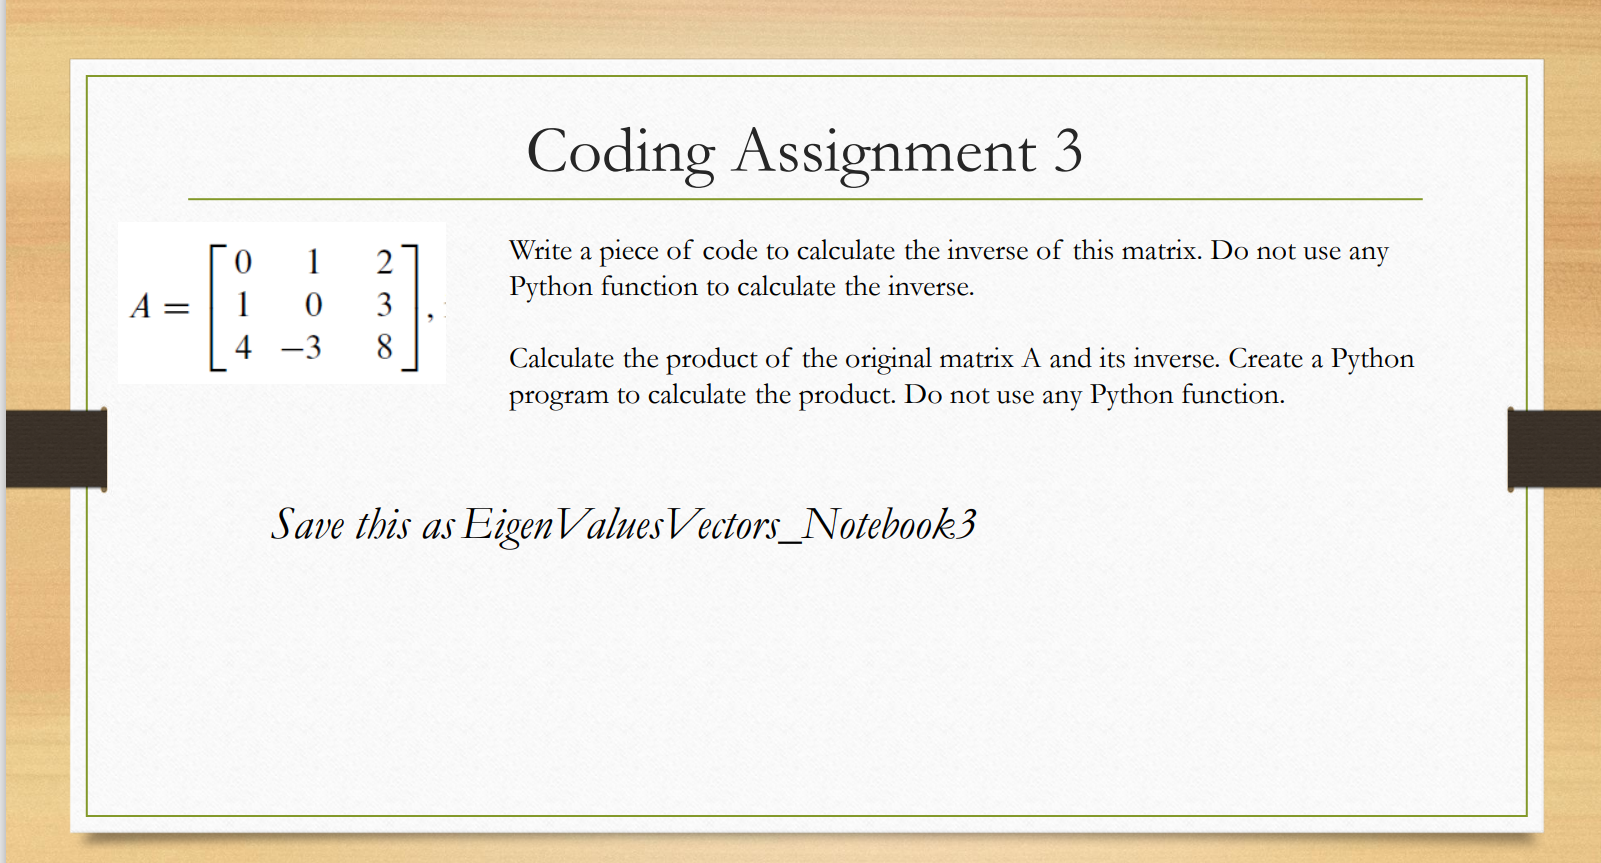

### Creating Reduced Row Echelon Form
**Initialization:**
- Create a copy of the input matrix to avoid modifying the original.
- Get the number of rows and columns in the matrix.

**Iterating through Rows:**
- Initialize the index for the leading variable to 0.
- Iterate over each row of the matrix.

**Finding Leading Element:**
- If the leading index exceeds the number of columns, stop the loop.
- Find a non-zero element in the current column.
- If no non-zero element is found, move to the next column.

**Swapping Rows:**
- Swap rows to bring the leading element to the diagonal position.

**Scaling Leading Row:**
- Get the value of the leading element.
- Make the leading element 1 by dividing the row by its leading element.

**Eliminating Other Elements in Column:**
- Perform row operations to make other elements in the column zero.
- Subtract multiples of the current row from other rows to eliminate non-zero elements in the column.

**Moving to Next Column:**
- Move to the next column and repeat the process.

**Returning RREF Matrix:**
- Once all columns have been processed, the matrix is in Reduced Row Echelon Form (RREF), so return it.


In [1]:
def rref(matrix):
    # Create a copy of the input matrix to avoid modifying the original
    copied_matrix = [row[:] for row in matrix]

    # Get the number of rows and columns in the matrix
    num_rows, num_cols = len(copied_matrix), len(copied_matrix[0])

    # Initialize the index for the leading variable
    leading_index = 0

    # Iterate over each row of the matrix
    for row_index in range(num_rows):
        # If the leading index exceeds the number of columns, stop the loop
        if leading_index >= num_cols:
            break

        # Find a non-zero element in the current column
        current_row_index = row_index
        while copied_matrix[current_row_index][leading_index] == 0:
            current_row_index += 1
            # If we reach the end of the rows, reset the current row and move to the next column
            if current_row_index == num_rows:
                current_row_index = row_index
                leading_index += 1
                # If all columns have been processed, the matrix is already in RREF, so return it
                if num_cols == leading_index:
                    return copied_matrix

        # Swap rows to bring the leading element to the diagonal position
        copied_matrix[current_row_index], copied_matrix[row_index] = copied_matrix[row_index], copied_matrix[current_row_index]

        # Get the value of the leading element
        leading_value = copied_matrix[row_index][leading_index]

        # Make the leading element 1 by dividing the row by its leading element
        copied_matrix[row_index] = [element / float(leading_value) for element in copied_matrix[row_index]]

        # Perform row operations to make other elements in the column zero
        for other_row_index in range(num_rows):
            if other_row_index != row_index:
                other_row_lead_val = copied_matrix[other_row_index][leading_index]
                # Subtract multiples of the current row from other rows
                copied_matrix[other_row_index] = [row_val - other_row_lead_val * row_val_in_current_row for row_val, row_val_in_current_row in zip(copied_matrix[row_index], copied_matrix[other_row_index])]

        # Move to the next column
        leading_index += 1

    # Return the matrix in Reduced Row Echelon Form (RREF)
    return copied_matrix


### Finding inverse of the matrix

1. **Get the number of rows and columns in the matrix:**
   - Determine the dimensions of the input matrix.

2. **Check if the matrix is square (equal number of rows and columns):**
   - Ensure that the number of rows is equal to the number of columns. If not, raise a ValueError indicating that the input matrix must be square.

3. **Augment the matrix with an identity matrix:**
   - Create an augmented matrix by appending an identity matrix to the right of the original matrix. An identity matrix is a square matrix with ones along the main diagonal and zeros elsewhere. Each row of the identity matrix is added to the corresponding row of the original matrix.

4. **Calculate the Reduced Row Echelon Form (RREF) of the augmented matrix:**
   - Use a function or algorithm to compute the RREF of the augmented matrix. The RREF transformation involves performing row operations to reduce the matrix to a specific form where leading entries are 1 and all entries above and below the leading entries are zeros.

5. **Extract the inverse matrix from the right-hand side of the RREF matrix:**
   - After obtaining the RREF of the augmented matrix, the inverse matrix can be found on the right-hand side of the augmented matrix, where the identity matrix was appended. Extract the columns corresponding to the identity matrix portion of the RREF matrix.

6. **Return the inverse matrix:**
   - Once the inverse matrix is extracted, return it as the output of the function.


In [8]:
def inverse(matrix):
    # Get the number of rows and columns in the matrix
    num_rows, num_cols = len(matrix), len(matrix[0])

    # Check if the matrix is square (equal number of rows and columns)
    if num_rows != num_cols:
        raise ValueError("Input matrix must be square")

    # Augment the matrix with an identity matrix
    augmented_matrix = [row + [int(i == j) for j in range(num_cols)] for i, row in enumerate(matrix)]

    # Perform row operations to transform the augmented matrix into reduced row echelon form (RREF)
    for i in range(num_rows):
        # Check if the leading coefficient is already zero
        if augmented_matrix[i][i] == 0:
            # Find a row below with a non-zero leading coefficient
            for k in range(i + 1, num_rows):
                if augmented_matrix[k][i] != 0:
                    augmented_matrix[i], augmented_matrix[k] = augmented_matrix[k], augmented_matrix[i]
                    break
            else:
                raise ValueError("Matrix is singular, cannot compute inverse")

        # Make the diagonal element 1
        factor = augmented_matrix[i][i]
        for j in range(num_cols * 2):
            augmented_matrix[i][j] /= factor
        # Make other elements in the column zero
        for k in range(num_rows):
            if k != i:
                factor = augmented_matrix[k][i]
                for j in range(num_cols * 2):
                    augmented_matrix[k][j] -= factor * augmented_matrix[i][j]

    # Extract the inverse matrix from the right-hand side of the RREF matrix (the identity matrix part)
    inv_matrix = [row[num_cols:] for row in augmented_matrix]

    # Return the inverse matrix
    return inv_matrix


### Product of the matrices
1. **Get the dimensions of matrices matrix1 and matrix2:**
   - Determine the number of rows and columns in both matrices.

2. **Initialize an empty result matrix with the appropriate dimensions:**
   - Create a new matrix with the number of rows equal to the number of rows in matrix1 and the number of columns equal to the number of columns in matrix2.

3. **Check if matrix multiplication is possible by comparing the number of columns in matrix1 with the number of rows in matrix2:**
   - Ensure that the number of columns in matrix1 is equal to the number of rows in matrix2.

4. **Perform matrix multiplication:**
   - Iterate through each row of matrix1 (indexed by i).
     - Iterate through each column of matrix2 (indexed by j).
       - Iterate through each corresponding element for multiplication (indexed by k).
         - Multiply the corresponding elements from matrix1 and matrix2, and accumulate the result in the appropriate cell of the result matrix.

5. **Return the resulting matrix:**
   - Once all multiplication and accumulation operations are complete, return the resulting matrix as the output of the function.


In [9]:
def matrix_multiply(matrix1, matrix2):
    # Get the dimensions of matrices matrix1 and matrix2
    matrix1_rows = len(matrix1)  # Number of rows in matrix1
    matrix1_cols = len(matrix1[0])  # Number of columns in matrix1
    matrix2_rows = len(matrix2)  # Number of rows in matrix2
    matrix2_cols = len(matrix2[0])  # Number of columns in matrix2

    # Initialize the result matrix with zeros
    result_matrix = [[0 for _ in range(matrix2_cols)] for _ in range(matrix1_rows)]

    # Check if matrix multiplication is possible (number of columns in matrix1 equals number of rows in matrix2)
    if matrix1_cols == matrix2_rows:
        # Perform matrix multiplication
        for i in range(matrix1_rows):  # Loop through each row of matrix1
            for j in range(matrix2_cols):  # Loop through each column of matrix2
                for k in range(matrix2_rows):  # Loop through each element for multiplication
                    result_matrix[i][j] += matrix1[i][k] * matrix2[k][j]  # Multiply and accumulate the result

    # Return the resulting matrix
    return result_matrix


In [10]:
def main():
    # Define the original matrix A
    matrix_A = [[0, 1, 2], [1, 0, 3], [4, -3, 8]]

    # Print original matrix A
    print("Original matrix A:")
    for row in matrix_A:
        print(row)

    # Calculate and print the inverse of matrix A
    inv_matrix = inverse(matrix_A)
    print("\nIts inverse is:")
    for row in inv_matrix:
        print(row)

    # Perform matrix multiplication of A and its inverse
    mult_result = matrix_multiply(matrix_A, inv_matrix)
    print("\nMatrix multiplication of A and its inverse:")
    for row in mult_result:
        print(row)

if __name__ == "__main__":
    main()

Original matrix A:
[0, 1, 2]
[1, 0, 3]
[4, -3, 8]

Its inverse is:
[-4.5, 7.0, -1.5]
[-2.0, 4.0, -1.0]
[1.5, -2.0, 0.5]

Matrix multiplication of A and its inverse:
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[0.0, 0.0, 1.0]
